In [2]:
import time

In [7]:
k = 40

def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

def fibonacciDynamic(n):
    fib = [0] * (n+2)
    fib[1] = 1
    for i in range(2, n+1):
        fib[n] = fib[n-1] + fib[n-2]

start = time.time()
fibonacci(k)
end = time.time()
print("Elapsed Time:", end - start)
print("F[%d]" % (k))

start = time.time()
fibonacciDynamic(k)
end = time.time()
print("Elapsed Time:", end - start)
print("F[%d]" % (k))

Elapsed Time: 29.877333164215088
F[40]
Elapsed Time: 5.316734313964844e-05
F[40]


## Exercise

For all the give numbers, $x_1,...,x_{n-1}$, such that $1 \leq x_{i} \leq m \leq 1,000,000$, check whether they may be presented as the sum of two Fibonacci numbers: $O(n+m)$

In [40]:
def FindFibSeq(ub):
    fib = [] 
    fib.append(0)
    fib.append(1)
    k = 2
    while (fib[k-1] + fib[k-2]) < ub:
        f = fib[k-1] + fib[k-2]
        fib.append(f)
        k = k + 1
    fib.append(ub)
    
    fib_hash = [0]*(ub+1)
    tmp_idx = 0
    tmp = fib[tmp_idx]
    for i in range(0, ub+1):
        if i < fib[tmp_idx+1]:
            pass
        else:
            tmp_idx = tmp_idx + 1
            while tmp >= fib[tmp_idx]:
                tmp_idx = tmp_idx + 1
            tmp = fib[tmp_idx]
        fib_hash[i] = tmp

    return fib_hash

def FindSum(x, fib_hash):
    pair = (0,0)
    cand_large = fib_hash[x]
    cand_small = fib_hash[x-cand_large]
    if (cand_large + cand_small) == x:
        pair = cand_small, cand_large
    return pair

def solution(A):
    ub = 1000000
    pairs = []
    fib_hash = FindFibSeq(ub)
    for x in A:
        pairs.append(FindSum(x, fib_hash))
    return pairs
    
A = [2,3,4,5,6,7,8,9,10,12,13,15,124312]

solution(A)

[(0, 2),
 (0, 3),
 (1, 3),
 (0, 5),
 (1, 5),
 (2, 5),
 (0, 8),
 (1, 8),
 (2, 8),
 (0, 0),
 (0, 13),
 (2, 13),
 (0, 0)]

## Tasks 1. Respectable
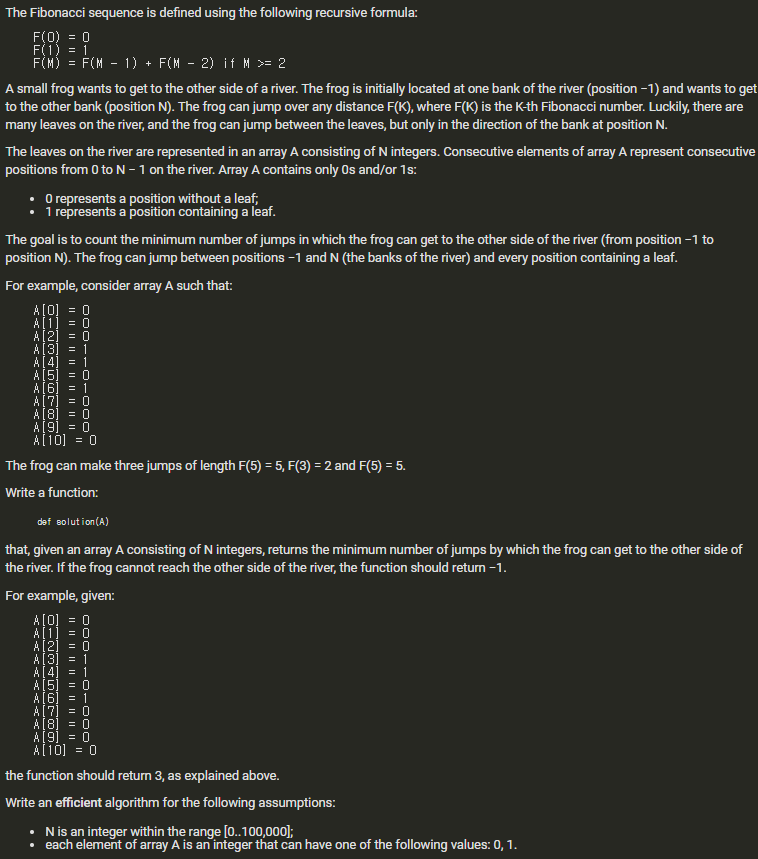

Complexity:
    expected worst-case time complexity is O(N*log(N));
    expected worst-case space complexity is O(N),
      beyond input storage (not counting the storage required for input arguments).
Elements of input arrays can be modified.

In [ ]:
def get_fib_seq_up_to_n(N):
    fib = [0] * (27)
    fib[1] = 1
    for i in range(2, 27):
        fib[i] = fib[i - 1] + fib[i - 2]
        if fib[i] > N:
            return fib[2:i]
        else:
            last_valid = i

def solution(A):
    A.append(1)
    ub = 100000
    fib = get_fib_seq_up_to_n(len(A))
    
    N = len(A)
    rechable = [-1]*(N)
    for jump in fib:
        if jump - 1 >= N:
            break
        if A[jump-1]==1:
            rechable[jump-1]=1
    
    for idx in range(N):
        if A[idx] == 1 and rechable[idx] < 0:
            min_idx = -1
            min_val = ub
            for jump in fib:
                pre_idx = idx - jump
                if pre_idx < 0:
                    break
                if rechable[pre_idx] > 0 and min_val > rechable[pre_idx]:
                    min_val = rechable[pre_idx]
                    min_idx = pre_idx 
            if min_idx != -1:
                rechable[idx] = min_val + 1
    return rechable[len(A)-1]


## Tasks 2. Respectable
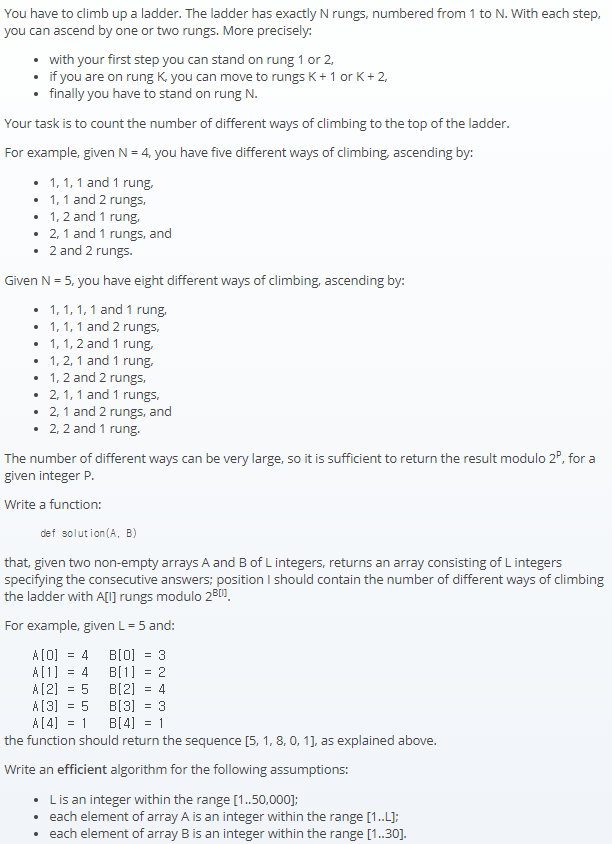